In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [110]:
train=pd.read_csv(r"C:\Users\11953\projet\train.csv")
test=pd.read_csv(r"C:\Users\11953\projet\test.csv")
submission=pd.read_csv(r"C:\Users\11953\projet\sample_submission.csv")

In [111]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [112]:
def train_data_info(df):
    print("\nInformations sur les Données d'Entraînement:")
    print("-"*30)
    df.info()
    print("\nValeurs manquantes dans le jeu de données d'entraînement:")
    print(df.isna().sum().nlargest(df.shape[1]))

In [113]:
train_data_info(train)


Informations sur les Données d'Entraînement:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

Valeurs manquantes dans le jeu de données d'entraînement:
CryoSl

In [114]:
print(train.describe().transpose())

               count        mean          std  min   25%   50%   75%      max
Age           8514.0   28.827930    14.489021  0.0  19.0  27.0  38.0     79.0
RoomService   8512.0  224.687617   666.717663  0.0   0.0   0.0  47.0  14327.0
FoodCourt     8510.0  458.077203  1611.489240  0.0   0.0   0.0  76.0  29813.0
ShoppingMall  8485.0  173.729169   604.696458  0.0   0.0   0.0  27.0  23492.0
Spa           8510.0  311.138778  1136.705535  0.0   0.0   0.0  59.0  22408.0
VRDeck        8505.0  304.854791  1145.717189  0.0   0.0   0.0  46.0  24133.0


In [115]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [116]:
def test_data_info(df):
    print("\nInformations sur les Données de Test:")
    print("-"*30)
    df.info()
    print("\nValeurs manquantes dans le jeu de données de test:")
    print(df.isna().sum().nlargest(df.shape[1]))

In [117]:
test_data_info(test)


Informations sur les Données de Test:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB

Valeurs manquantes dans le jeu de données de test:
FoodCourt       106
Spa             101
Cabin           100
ShoppingMall

In [118]:
print(test.describe().transpose())

               count        mean          std  min   25%   50%   75%      max
Age           4186.0   28.658146    14.179072  0.0  19.0  26.0  37.0     79.0
RoomService   4195.0  219.266269   607.011289  0.0   0.0   0.0  53.0  11567.0
FoodCourt     4171.0  439.484296  1527.663045  0.0   0.0   0.0  78.0  25273.0
ShoppingMall  4179.0  177.295525   560.821123  0.0   0.0   0.0  33.0   8292.0
Spa           4176.0  303.052443  1117.186015  0.0   0.0   0.0  50.0  19844.0
VRDeck        4197.0  310.710031  1246.994742  0.0   0.0   0.0  36.0  22272.0


In [119]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [120]:
train.set_index('PassengerId',inplace=True)
test.set_index('PassengerId',inplace=True)
colonnes=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for col in colonnes:
    train[col].fillna(0,inplace=True)
    test[col].fillna(0,inplace=True)
median_age_train=train['Age'].median()
train['Age'].fillna(median_age_train,inplace=True)
test['Age'].fillna(median_age_train,inplace=True)
dic= {'VIP':False,'HomePlanet':'Earth','Destination':'TRAPPIST-1e','CryoSleep':False,'Cabin':'A/0/S'}
for col,value in dic.items():
    train[col].fillna(value,inplace=True)
    test[col].fillna(value,inplace=True)

In [121]:
print(train.describe().transpose())

               count        mean          std  min   25%   50%   75%      max
Age           8693.0   28.790291    14.341404  0.0  20.0  27.0  37.0     79.0
RoomService   8693.0  220.009318   660.519050  0.0   0.0   0.0  41.0  14327.0
FoodCourt     8693.0  448.434027  1595.790627  0.0   0.0   0.0  61.0  29813.0
ShoppingMall  8693.0  169.572300   598.007164  0.0   0.0   0.0  22.0  23492.0
Spa           8693.0  304.588865  1125.562559  0.0   0.0   0.0  53.0  22408.0
VRDeck        8693.0  298.261820  1134.126417  0.0   0.0   0.0  40.0  24133.0


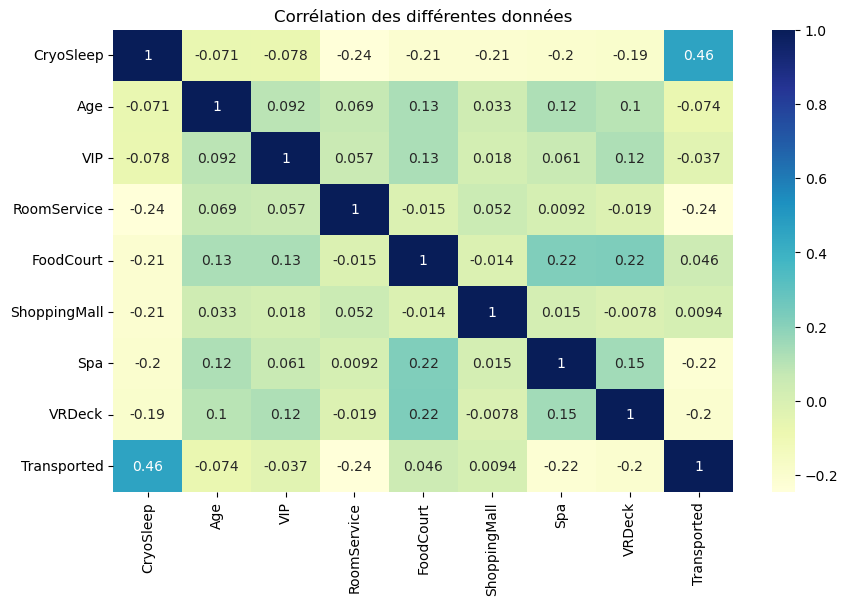

In [122]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")
plt.title('Corrélation des différentes données')
plt.show()

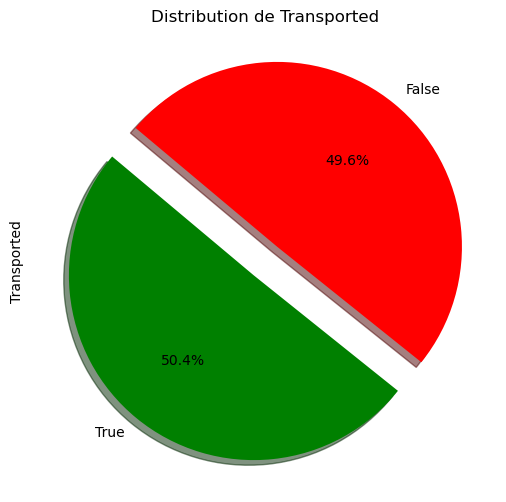

In [123]:
colors=["green","red"]
plt.figure(figsize=(8,6))
train['Transported'].value_counts().plot.pie(explode=[0.1, 0.1],colors=colors,shadow=True,autopct='%1.1f%%',startangle=140)
plt.title('Distribution de Transported')
plt.show()

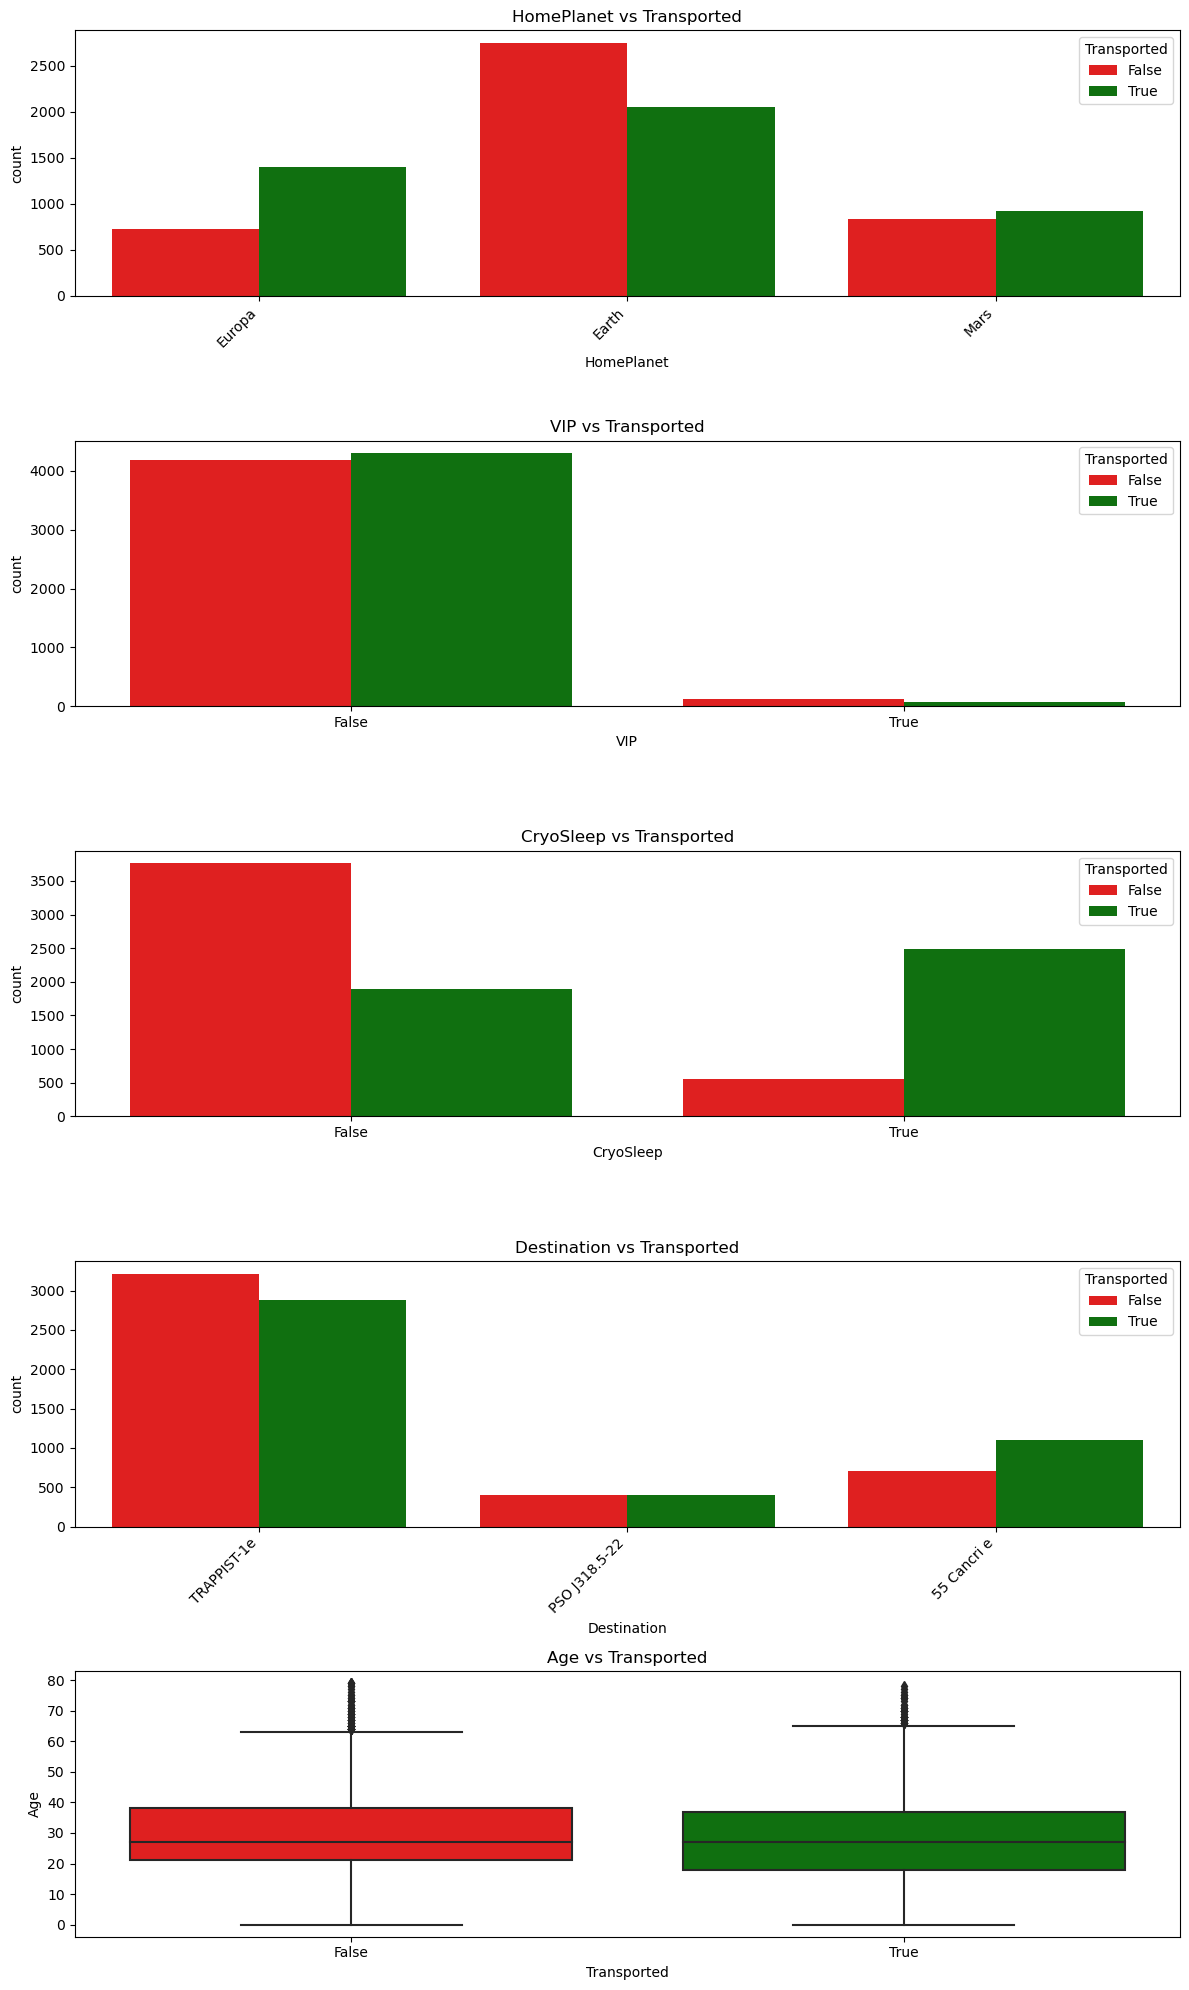

In [124]:
fig,axe=plt.subplots(5,1,figsize=(12, 20))
colors=["red","green"]
sns.countplot(data=train,x='HomePlanet',hue='Transported',palette=colors,ax=axe[0])
axe[0].set_title('HomePlanet vs Transported')
axe[0].set_xticklabels(axe[0].get_xticklabels(),rotation=45,ha='right')
sns.countplot(data=train,x='VIP',hue='Transported',palette=colors,ax=axe[1])
axe[1].set_title('VIP vs Transported')
sns.countplot(data=train,x='CryoSleep',hue='Transported',palette=colors,ax=axe[2])
axe[2].set_title('CryoSleep vs Transported')
sns.countplot(data=train,x='Destination',hue='Transported',palette=colors,ax=axe[3])
axe[3].set_title('Destination vs Transported')
axe[3].set_xticklabels(axe[3].get_xticklabels(),rotation=45,ha='right')
sns.boxplot(data=train,x='Transported',y='Age',palette=colors,ax=axe[4])
axe[4].set_title('Age vs Transported')
plt.tight_layout()
plt.show()

In [125]:
train[['Deck','Num','Side']]=train.Cabin.str.split('/',expand=True)
test[['Deck','Num','Side']]=test.Cabin.str.split('/',expand=True)

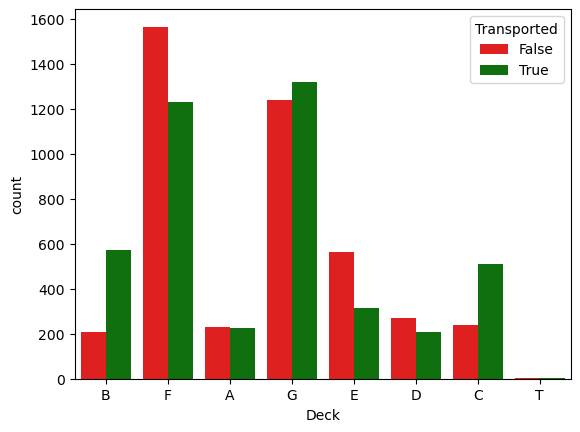

In [126]:
couleur={True:'green',False:'red'}
sns.countplot(x='Deck',hue='Transported',data=train,palette=couleur)
plt.show()

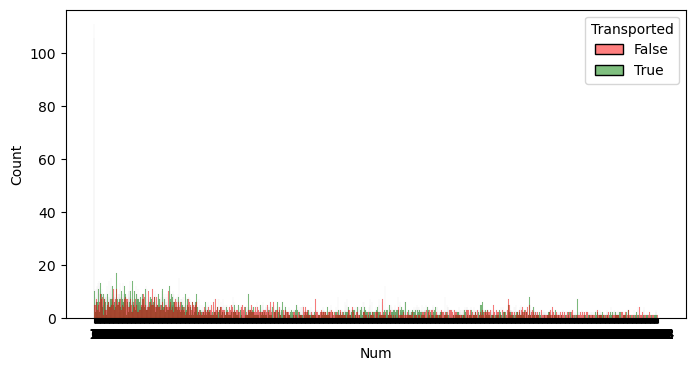

In [127]:
plt.figure(figsize=(8,4))
sns.histplot(data=train,x='Num',hue='Transported',bins=14, palette=couleur)
plt.show()

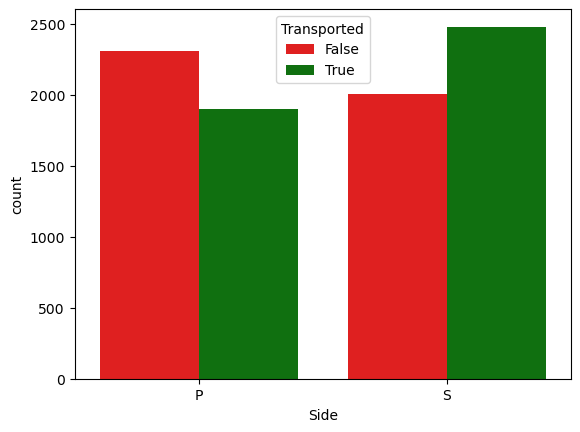

In [128]:
sns.countplot(data=train,x='Side',hue='Transported',palette=couleur)
plt.show()

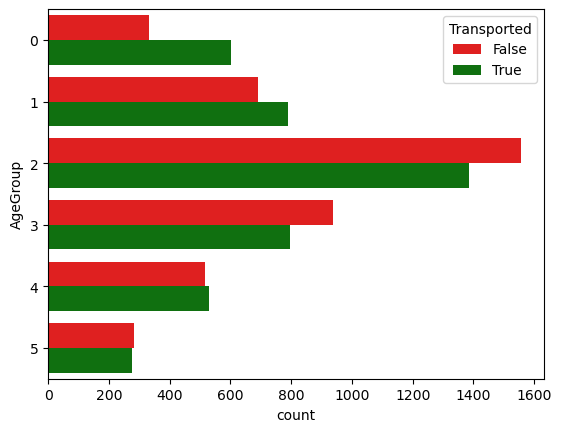

In [129]:
train['total_spent']= train['RoomService']+train['FoodCourt']+train['ShoppingMall']+train['Spa']+train['VRDeck']
test['total_spent']=test['RoomService']+test['FoodCourt']+test['ShoppingMall']+test['Spa']+test['VRDeck']
train['AgeGroup']=0
for i in range(6):
    train.loc[(train.Age>=10*i)&(train.Age<10*(i+1)),'AgeGroup']=i
test['AgeGroup']=0
for i in range(6):
    test.loc[(test.Age>=10*i)&(test.Age<10*(i+1)),'AgeGroup']=i
sns.countplot(y=train['AgeGroup'],hue=train['Transported'],palette=couleur)
plt.show()

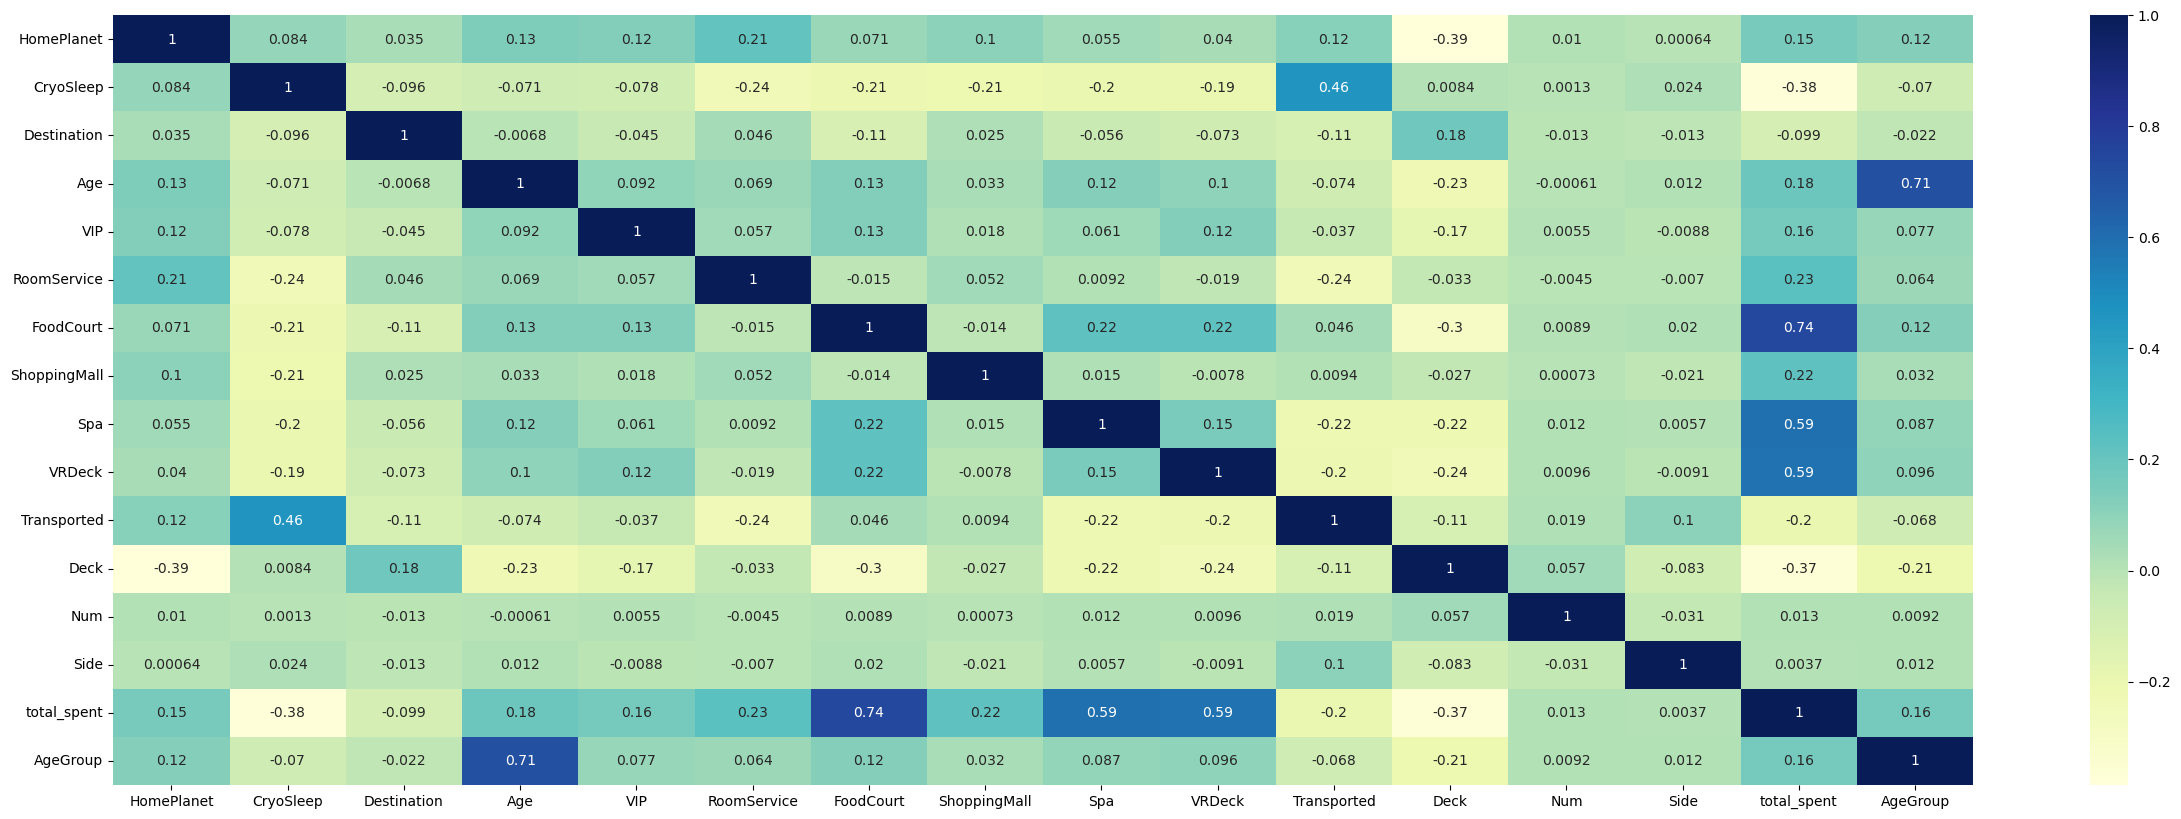

In [130]:
new_cols= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num']
for i in new_cols:
    f=LabelEncoder()
    n=np.concatenate((train[i],test[i])).astype(str)
    f.fit(n)
    train[i]=f.transform(train[i].astype(str))
    test[i]=f.transform(test[i].astype(str))
train=train.drop(['Name','Cabin'],axis=1)
test=test.drop(['Name','Cabin'],axis=1)
plt.figure(figsize=(30,10))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [131]:
train['Transported']=train['Transported'].replace({True:1,False:0})
X=train.drop('Transported',axis=1)
y=train['Transported']
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25,random_state=0)

In [132]:
print("Entraînement du classificateur CatBoost")
cb=CatBoostClassifier(iterations=1500,eval_metric='Accuracy',verbose=0)
cb.fit(X_train,y_train)
pred_y=model.predict(X_val)
pred=model.predict(X_train)
print("Précision de l'entraînement CatBoost :",accuracy_score(y_train.values,pred))
print("Précision de la validation CatBoost :",accuracy_score(y_val.values,pred_y))

Entraînement du classificateur CatBoost
Précision de l'entraînement CatBoost : 0.8824973155391931
Précision de la validation CatBoost : 0.81278748850046


In [133]:
print("Entraînement du classificateur GradientBoosting")
gb=GradientBoostingClassifier(random_state=1,n_estimators=250,learning_rate=0.15,max_depth=3)
gb.fit(X_train,y_train)
pred_y=gb.predict(X_val)
pred=gb.predict(X_train)
print("Précision de l'entraînement GradientBoosting :",accuracy_score(y_train.values, pred))
print("Précision de la validation GradientBoosting :",accuracy_score(y_val.values, pred_y))

Entraînement du classificateur GradientBoosting
Précision de l'entraînement GradientBoosting : 0.8668507439791379
Précision de la validation GradientBoosting : 0.8068077276908924


In [134]:
print("Entraînement du classificateur LGBM")
lgbm=LGBMClassifier(random_state=1,n_estimators=250,learning_rate=0.15,max_depth=3,verbose=-1)
lgbm.fit(X_train,y_train)
pred_y_lgbm=lgbm.predict(X_val)
pred_lgbm=lgbm.predict(X_train)
print("Précision de l'entraînement LGBM :",accuracy_score(y_train.values, pred_lgbm))
print("Précision de la validation LGBM :",accuracy_score(y_val.values, pred_y_lgbm))

Entraînement du classificateur LGBM
Précision de l'entraînement LGBM : 0.8588740604387176
Précision de la validation LGBM : 0.8063477460901564


In [135]:
print("Entraînement du classificateur XGBoost")
xgb=XGBClassifier(random_state=1,n_estimators=250,learning_rate=0.15,max_depth=3)
xgb.fit(X_train,y_train)
pred_y_xgb=xgb.predict(X_val)
pred_xgb=xgb.predict(X_train)
print("Précision de l'entraînement XGBoost :",accuracy_score(y_train.values,pred_xgb))
print("Précision de la validation XGBoost :",accuracy_score(y_val.values,pred_y_xgb))

Entraînement du classificateur XGBoost
Précision de l'entraînement XGBoost : 0.8553459119496856
Précision de la validation XGBoost : 0.8068077276908924


In [136]:
cb.fit(X,y)
y_pred_cb=cb.predict(test)
sub = pd.DataFrame({'PassengerId': test.index,'Transported':y_pred_cb.astype(bool)})
sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [137]:
sub.to_csv('submission.csv',index=False)

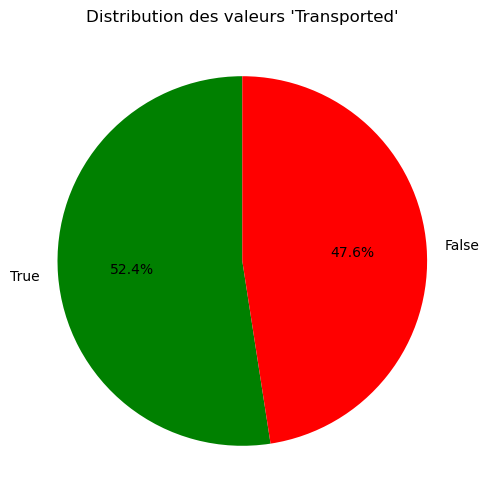

In [138]:
def analyse(fil):
    df=pd.read_csv(r"C:\Users\11953\projet\submission.csv")
    compte=df['Transported'].value_counts()
    plt.figure(figsize=(8,6))
    plt.pie(compte,labels=compte.index,autopct='%1.1f%%',startangle=90,colors=['green','red'])
    plt.title("Distribution des valeurs 'Transported'")
    plt.show()
analyse('submission.csv')